## Python的datetime对象

In [1]:
# Python内置了datetime对象，可以在datetime库中找到
from datetime import datetime
now = datetime.now()


In [2]:
# 还可以手动创建datetime
t1 = datetime.now()
t2 = datetime(2020,1,1)



In [3]:
diff = t1-t2


In [4]:
diff

datetime.timedelta(361, 56899, 72025)

In [5]:
# 查看diff的数据类型
type(diff)

datetime.timedelta

## 将pandas中的数据转换成datetime

### to_datetime函数

In [6]:
import pandas as pd

In [7]:
# 可以使用to_datetime函数把数据转换成datetime类型
# 加载数据 并把Date列转换为datetime对象
ebola = pd.read_csv('data/country_timeseries.csv')


In [8]:
#获取左上角数据
ebola.iloc[:5,:5]


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0


In [9]:
# 从数据中看出 Date列是日期，但通过info查看加载后数据为object类型
ebola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.3+ KB


In [10]:
# 可以通过to_datetime方法把Date列转换为datetime,然后创建新列
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

### 通过parse_dates参数指定


In [11]:
ebola = pd.read_csv('data/country_timeseries.csv',parse_dates=[0])
ebola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.3 KB


## 提取日期的各个部分

### 获取了Timestamp对象

In [12]:
d = pd.to_datetime('2020-06-20')


In [13]:
# 可以看到得到的数据是Timestamp类型，通过Timestamp可以获取年，月，日等部分
d.year



2020

In [14]:
d.month


6

In [15]:
d.day

20

In [16]:
# 通过ebola数据集的Date列，创建新列year
ebola['year'] = ebola['Date'].dt.year
ebola['year']


0      2015
1      2015
2      2015
3      2015
4      2014
       ... 
117    2014
118    2014
119    2014
120    2014
121    2014
Name: year, Length: 122, dtype: int64

In [17]:
# 创建年月
ebola['month'],ebola['day']  = (ebola['Date'].dt.month,ebola['Date'].dt.day)
ebola[['Date','year','month','day']].head()
ebola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
year                   122 non-null int64
month                  122 non-null int64
day                    122 non

## 日期运算和Timedelta

### 介绍

In [18]:
# 获取疫情爆发的第一天
ebola['Date'].min()


Timestamp('2014-03-22 00:00:00')

In [19]:
# 添加新列
ebola['outbreak_d'] = ebola['Date']-ebola['Date'].min()


In [20]:
# 查看数据
ebola[['Date','Day','outbreak_d']].head()
ebola[['Date','Day','outbreak_d']].tail()


,Date,Day,outbreak_d
117,2014-03-27,5,5 days
118,2014-03-26,4,4 days
119,2014-03-25,3,3 days
120,2014-03-24,2,2 days
121,2014-03-22,0,0 days


In [21]:
# Timestamp相减得到的是timedelta对象
ebola.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
year                   122 non-null int64
month                  122 non-null int64
day                    122 non

### 案例

In [22]:
# 加载数据
banks = pd.read_csv('data/banklist.csv')
banks.head()




,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [23]:
# 可以看到有两列数据是日期时间类型，可以在导入数据的时候直接解析日期
banks = pd.read_csv('data/banklist.csv',parse_dates=[5,6])
banks.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
Bank Name                553 non-null object
City                     553 non-null object
ST                       553 non-null object
CERT                     553 non-null int64
Acquiring Institution    553 non-null object
Closing Date             553 non-null datetime64[ns]
Updated Date             553 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


In [24]:
# 添加两列，分别表示银行破产的季度和年份
banks['closing_quarter'],banks['closing_year'] = (banks['Closing Date'].dt.quarter,banks['Closing Date'].dt.year)


In [25]:
# 可以根据新添加的两列，计算每年破产银行数量，计算每年每季度破产银行数量
closing_year = banks.groupby(['closing_year']).size()
closing_year


closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64

In [26]:
closing_year_q = banks.groupby(['closing_year','closing_quarter']).size()


In [27]:
# 可以使用绘图函数绘制结果
closing_year.plot()



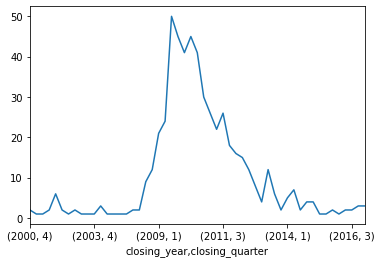

In [28]:
closing_year_q.plot()

## 处理股票数据

###  介绍


In [30]:
#加载特斯拉股票数据
tesla = pd.read_csv('data/TSLA.csv')
tesla



,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
1,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
3,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
4,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
...,...,...,...,...,...,...,...
1210,2020-06-10,1027.479980,982.500000,991.880005,1025.050049,18563400,1025.050049
1211,2020-06-11,1018.960022,972.000000,990.200012,972.840027,15916500,972.840027
1212,2020-06-12,987.979980,912.599976,980.000000,935.280029,16730200,935.280029
1213,2020-06-15,998.840027,908.500000,917.789978,990.900024,15697200,990.900024


In [31]:
# tesla股票数据中第一列为日期，在加载数据的时候，可以直接解析日期数据
tesla = pd.read_csv('data/TSLA.csv',parse_dates=[0])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 7 columns):
Date         1215 non-null datetime64[ns]
High         1215 non-null float64
Low          1215 non-null float64
Open         1215 non-null float64
Close        1215 non-null float64
Volume       1215 non-null int64
Adj Close    1215 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 66.6 KB


### 基于日期数据获取数据子集

In [32]:
# 获取2015年8月的股票数据
tesla.loc[(tesla.Date.dt.year ==2015) & (tesla.Date.dt.month==8)]


,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
1,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
3,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
4,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999
5,2015-08-26,228.000000,215.509995,227.929993,224.839996,4963000,224.839996
6,2015-08-27,244.750000,230.809998,231.000000,242.990005,7656000,242.990005
7,2015-08-28,251.449997,241.570007,241.860001,248.479996,5513700,248.479996
8,2015-08-31,254.949997,245.509995,245.619995,249.059998,4700200,249.059998


In [33]:
# DatetimeIndex对象
# 在处理包含datetime的数据时，经常需要把datetime对象设置成DateFrame的索引
# 首先把Date列指定为索引
tesla.index = tesla['Date']
tesla.index



DatetimeIndex(['2015-08-19', '2015-08-20', '2015-08-21', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-31', '2015-09-01',
               ...
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
               '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12',
               '2020-06-15', '2020-06-16'],
              dtype='datetime64[ns]', name='Date', length=1215, freq=None)

In [34]:
tesla.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-08-19,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000
2015-08-20,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993
2015-08-21,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004
2015-08-24,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995
2015-08-25,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999


In [35]:
# 把索引设置为日期对象后，可以直接使用日期来获取某些数据
tesla['2016'].iloc[:5]


,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2016-01-04,2016-01-04,231.380005,219.000000,230.720001,223.410004,6827100,223.410004
2016-01-05,2016-01-05,226.889999,220.000000,226.360001,223.429993,3186800,223.429993
2016-01-06,2016-01-06,220.050003,215.979996,220.000000,219.039993,3779100,219.039993
2016-01-07,2016-01-07,218.440002,213.669998,214.190002,215.649994,3554300,215.649994
2016-01-08,2016-01-08,220.440002,210.770004,217.860001,211.000000,3628100,211.000000


In [36]:
# 也可以根据年份和月份获取数据
tesla['2016-06'].iloc[:5]


,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2016-06-01,2016-06-01,222.399994,216.889999,221.479996,219.559998,2982700,219.559998
2016-06-02,2016-06-02,219.910004,217.110001,219.589996,218.960007,2032800,218.960007
2016-06-03,2016-06-03,221.940002,218.009995,220.000000,218.990005,2229000,218.990005
2016-06-06,2016-06-06,220.899994,215.449997,218.000000,220.679993,2249500,220.679993
2016-06-07,2016-06-07,234.440002,221.520004,222.240005,232.339996,6213600,232.339996


In [38]:
# TimedeltaIndex对象
# 首先创建一个timedelta
tesla['ref_date'] = tesla['Date']-tesla['Date'].min()
tesla['ref_date']


Date
2015-08-19      0 days
2015-08-20      1 days
2015-08-21      2 days
2015-08-24      5 days
2015-08-25      6 days
                ...   
2020-06-10   1757 days
2020-06-11   1758 days
2020-06-12   1759 days
2020-06-15   1762 days
2020-06-16   1763 days
Name: ref_date, Length: 1215, dtype: timedelta64[ns]

In [40]:
# 把timedelta设置为index
tesla.index = tesla['ref_date'] 
tesla.info()


<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 1215 entries, 0 days to 1763 days
Data columns (total 8 columns):
Date         1215 non-null datetime64[ns]
High         1215 non-null float64
Low          1215 non-null float64
Open         1215 non-null float64
Close        1215 non-null float64
Volume       1215 non-null int64
Adj Close    1215 non-null float64
ref_date     1215 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), timedelta64[ns](1)
memory usage: 85.4 KB


In [41]:
# 把timedelta设置为index
tesla.index = tesla['ref_date'] 
tesla.info()


<class 'pandas.core.frame.DataFrame'>
TimedeltaIndex: 1215 entries, 0 days to 1763 days
Data columns (total 8 columns):
Date         1215 non-null datetime64[ns]
High         1215 non-null float64
Low          1215 non-null float64
Open         1215 non-null float64
Close        1215 non-null float64
Volume       1215 non-null int64
Adj Close    1215 non-null float64
ref_date     1215 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), timedelta64[ns](1)
memory usage: 85.4 KB


In [42]:
tesla.head()


,Date,High,Low,Open,Close,Volume,Adj Close,ref_date
ref_date,,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000,0 days
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993,1 days
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004,2 days
5 days,2015-08-24,231.399994,195.000000,202.789993,218.869995,9581600,218.869995,5 days
6 days,2015-08-25,230.899994,219.119995,230.520004,220.029999,4327300,220.029999,6 days


In [43]:
# 可以基于ref_date来选择数据
tesla['0 days':'4 days']


,Date,High,Low,Open,Close,Volume,Adj Close,ref_date
ref_date,,,,,,,,
0 days,2015-08-19,260.649994,255.020004,260.329987,255.250000,3604300,255.250000,0 days
1 days,2015-08-20,254.559998,241.899994,252.059998,242.179993,4905800,242.179993,1 days
2 days,2015-08-21,243.800003,230.509995,236.000000,230.770004,6590200,230.770004,2 days


## 日期范围

### 使用date_range函数来创建连续的日期范围


In [45]:
ebola.iloc[:,:5]


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0
...,...,...,...,...,...
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN


In [46]:
# 使用date_range函数
head_range = pd.date_range(start='2014-12-31',end='2015-01-05')


In [47]:
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [48]:
# 在上面的例子中，只取前5行，首先设置日期索引，然后为数据重建连续索引
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5.reindex(head_range).iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0
2015-01-01,NaT,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0


In [50]:
# 2020年1月1日这周所有的工作日
pd.date_range('2020-01-01','2020-01-07',freq='B')


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07'],
              dtype='datetime64[ns]', freq='B')

In [52]:
# 在freq传入参数的基础上，可以做一些调整
# 隔一个工作日取一个工作日
pd.date_range('2020-01-01','2020-01-07',freq='2B')


DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-07'], dtype='datetime64[ns]', freq='2B')

In [53]:
# freq传入的参数可以传入多个
#2020年每个月的第一个星期四
pd.date_range('2020-01-01','2020-12-31',freq='WOM-1THU')



DatetimeIndex(['2020-01-02', '2020-02-06', '2020-03-05', '2020-04-02',
               '2020-05-07', '2020-06-04', '2020-07-02', '2020-08-06',
               '2020-09-03', '2020-10-01', '2020-11-05', '2020-12-03'],
              dtype='datetime64[ns]', freq='WOM-1THU')

In [54]:
#每个月的第三个星期五
pd.date_range('2020-01-01','2020-12-31',freq='WOM-3FRI')



DatetimeIndex(['2020-01-17', '2020-02-21', '2020-03-20', '2020-04-17',
               '2020-05-15', '2020-06-19', '2020-07-17', '2020-08-21',
               '2020-09-18', '2020-10-16', '2020-11-20', '2020-12-18'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

## datetime类型案例


### 加载数据

In [56]:
# 加载数据
crime = pd.read_csv('data/crime.csv',parse_dates=['REPORTED_DATE'])


In [57]:
# 查看数据
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null object
OFFENSE_CATEGORY_ID    460911 non-null object
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null object
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 28.1+ MB


In [58]:
# 设置报警时间为索引
crime = crime.set_index('REPORTED_DATE')
crime.head()



,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


### 查看数据集

In [61]:
# 查看某一天的报警记录
crime.loc['2016-05-12']


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [62]:
# 查看某一天的报警记录
crime.loc['2016-05-12']


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [63]:
# 查看某一段时间的犯罪记录
crime.loc['2015-3-4':'2016-1-1'].sort_index()


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0


In [65]:
# 时间段可以包括小时分钟
crime.loc['2015-3-4 22':'2016-1-1 23:45:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,theft-unauth-use-of-ftd,white-collar-crime,-105.045234,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:07:00,traf-other,all-other-crimes,-104.980400,39.740144,north-capitol-hill,1,0
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1


In [66]:
# 查询凌晨两点到五点的报警记录
crime.between_time('2:00', '5:00', include_end=False)


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [68]:
# 查看发生在某个时刻的犯罪记录
crime.at_time('5:47')


,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751535,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


In [71]:
# 在按时间段选取数据时，可以将时间索引排序，排序之后再选取效率更高
crime_sort = crime.sort_index()



In [72]:
%timeit crime.loc['2015-3-4':'2016-1-1']


10.5 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
%timeit crime_sort.loc['2015-3-4':'2016-1-1']


831 µs ± 101 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 计算每周的犯罪数量

In [75]:
# resample重采样，可以按照指定时间周期分组
crime_sort.resample('W')


In [76]:
#size查看分组大小
weekly_crimes = crime_sort.resample('W').size()
weekly_crimes


REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [78]:
# 检验分组结果
len(crime_sort.loc[:'2012-1-8'])


877

In [79]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])


1071

In [80]:
# 也可以把周四作为每周的结束
crime_sort.resample('W-THU').size()


REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20025 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29359 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/

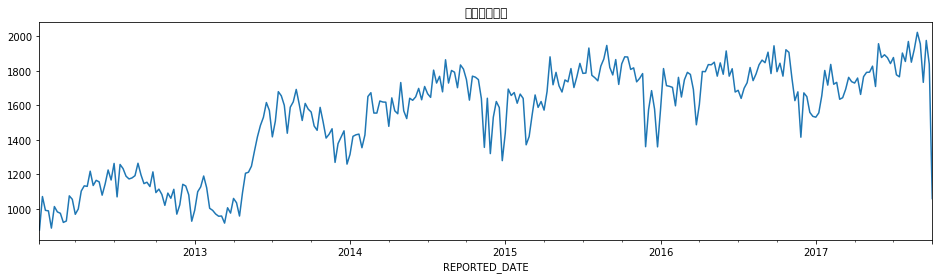

In [81]:
# 将按周分组结果可视化
weekly_crimes.plot(figsize=(16,4),title='丹佛犯罪情况')


### 分析每季度的犯罪和交通事故数据

In [82]:
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
2013-06-30,12259,4510
2013-09-30,15799,4942
2013-12-31,13910,4968
2014-03-31,14487,5021


In [83]:
# 所有日期都是该季度的最后一天，使用QS生成每季度的第一天
crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum().head()


,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [84]:
# 查看第二季度的数据，检验结果
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()


IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25925 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/

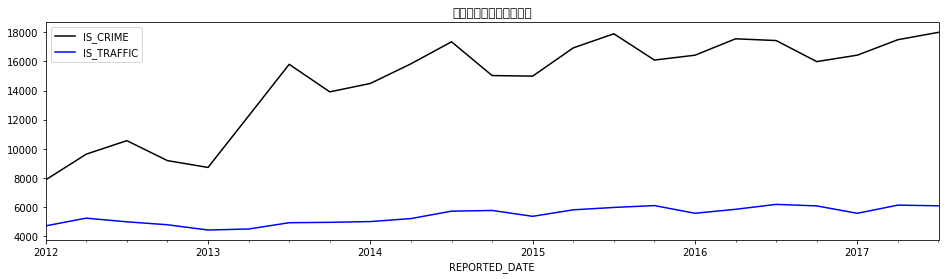

In [85]:
# 结果可视化
plot_kwargs = dict(figsize=(16,4), color=['black', 'blue'], title='丹佛犯罪和交通事故数据')
crime_quarterly.plot(**plot_kwargs)


### 分析工作日的犯罪情况

In [86]:
# 可以通过Timestamp的dt属性得到周几，然后统计
crime = pd.read_csv('data/crime.csv', parse_dates=['REPORTED_DATE'])
wd_counts = crime['REPORTED_DATE'].dt.weekday.value_counts()
wd_counts



0    70024
4    69621
2    69538
3    69287
1    68394
5    58834
6    55213
Name: REPORTED_DATE, dtype: int64

/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/vincent/anaconda3/envs/itcast/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25353 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/vincent/an

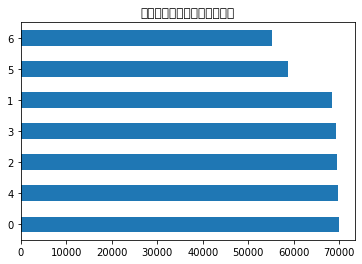

In [87]:
title = '丹佛犯罪和交通事故按周分析'
wd_counts.plot(kind='barh', title=title)
